In [1]:
import niftiutils.helper_fxns as hf
import niftiutils.transforms as tr
import niftiutils.registration as regs
import os
import shutil
import pandas as pd
import numpy as np
import pylab
import importlib
import shutil
import copy

import dicom2nifti
import dicom2nifti.compressed_dicom as compressed_dicom
%matplotlib inline

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
import wgan
import dcgan
import argparse
import data

In [2]:
import neural_style_transfer as nst

Using TensorFlow backend.


In [37]:
importlib.reload(nst)

<module 'neural_style_transfer' from 'C:\\Users\\Clinton\\Documents\\CBCT\\neural_style_transfer.py'>

In [ ]:
args = nst.init_args()

In [5]:
cbct_dcm_path = r"Z:\CBCT\imgs\E105393873\xper ct abdomen dual phase high quality open_5006"

In [14]:
cbct_img, _ = hf.dcm_load(cbct_dcm_path)
cbct_img = tr.apply_window(cbct_img, wl=-60, ww=800)

In [17]:
importlib.reload(hf)

<module 'niftiutils.helper_fxns' from 'c:\\users\\clinton\\documents\\niftiutils\\niftiutils\\helper_fxns.py'>

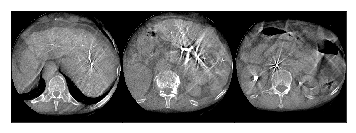

In [16]:
hf.draw_slices(cbct_img)

In [9]:
cbct_png_path = "D:\\cbct.png"
hf.save_slice_as_img(cbct_img, cbct_png_path)

In [34]:
args['base_image_path'] = cbct_png_path

In [19]:
mdct_dcm_path = r"Z:\Isa\spect\12973122\y90 sirs   5.0  b31s_3"

In [20]:
mdct_img, _ = hf.dcm_load(mdct_dcm_path)
mdct_img = tr.apply_window(mdct_img, wl=-60, ww=800)

In [31]:
mdct_img = mdct_img[mdct_img.shape[0]//4:mdct_img.shape[0]*3//4,mdct_img.shape[1]//4:mdct_img.shape[1]*2//3]

In [ ]:
mdct_png_path = "D:\\mdct.png"
hf.save_slice_as_img(mdct_img, mdct_png_path)

In [33]:
args['style_reference_image_path'] = mdct_png_path

In [45]:
importlib.reload(nst)

<module 'neural_style_transfer' from 'C:\\Users\\Clinton\\Documents\\CBCT\\neural_style_transfer.py'>

In [ ]:
nst.run(args)

In [13]:
importlib.reload(wgan)

<module 'wgan' from 'C:\\Users\\Clinton\\Documents\\CBCT\\wgan.py'>

In [ ]:
x_sampler = data.DataSampler()
z_sampler = data.NoiseSampler()

discriminator = dcgan.Discriminator()
generator = dcgan.Generator()

model = wgan.WassersteinGAN(generator, discriminator, x_sampler, z_sampler, dcgan)

#model.train(nb_epoch=500, batch_size=64)

In [ ]:
model = wgan.WassersteinGAN(generator, discriminator, x_sampler, z_sampler, dcgan)
model.train(nb_epoch=5000, batch_size=64)

In [1]:
img_dir = r"D:\CBCT\AARON"
dcm_path = img_dir+"\\15814.dcm"

In [ ]:
dicom_input = compressed_dicom.read_file(dcm_path,
                                       defer_size=100,
                                       stop_before_pixels=False,
                                       force=False)

In [ ]:
cine_rate = float(dicom_input[('0018', '0040')].value)
kvp = float(dicom_input[('0018', '0060')].value)
d_detector = int(dicom_input[('0018', '1110')].value)
d_patient = int(dicom_input[('0018', '1111')].value)
t_exposure = int(dicom_input[('0018', '1150')].value)
current = int(dicom_input[('0018', '1151')].value)
exposure = int(dicom_input[('0018', '1152')].value)
pixel_spacing = dicom_input[('0018', '1164')].value
angle1 = float(dicom_input[('0018', '1510')].value)
angle2 = float(dicom_input[('0018', '1511')].value)
angle1_increment = dicom_input[('0018', '1520')].value
angle2_increment = dicom_input[('0018', '1521')].value
shutter_edges = [int(dicom_input[('0018', str(x))].value) for x in [1602, 1604, 1606, 1608]]

In [4]:
proj_imgs = hf.dcm_load(img_dir+"\\15814.dcm")
proj_imgs = np.transpose(proj_imgs, (1,2,0))
proj_imgs_unscaled = copy.deepcopy(proj_imgs)
proj_imgs = (proj_imgs - np.amin(proj_imgs)) / (np.amax(proj_imgs) - np.amin(proj_imgs))

In [5]:
proj_imgs = proj_imgs[:, :, 50:-50]
rows, frames, cols = proj_imgs.shape

In [27]:
recon_img = hf.dcm_load(img_dir+"\\15810.dcm")
recon_img = np.transpose(recon_img, (1,2,0))[::-1,:,:]

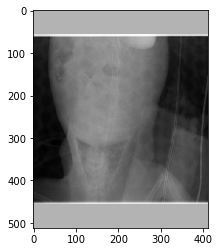

In [19]:
pylab.imshow(proj_data[:,100,:], cmap='gray')

In [186]:
proj_imgs.shape

(512, 308, 412)

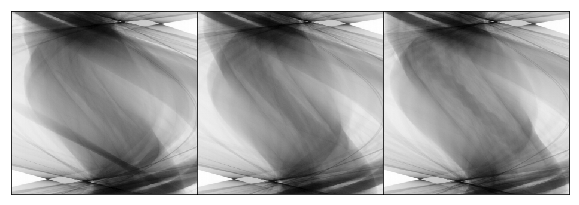

In [193]:
hf.draw_slices(np.transpose(proj_imgs[-100:300:-1,:,50:-50],(2,1,0)), width=10)

In [377]:
hf.save_nii(rec_cropped, "D:\\recon.nii")

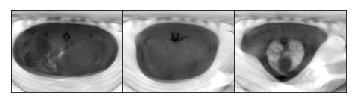

In [380]:
hf.draw_slices(rec_cropped, width=10)

In [394]:
rec_cropped = rec[:,10:120,20:170]
rec_cropped[rec_cropped < 0] = 0
rec_cropped = np.transpose(rec_cropped, (2,1,0))

In [395]:
rec_cropped = rec_cropped * -1

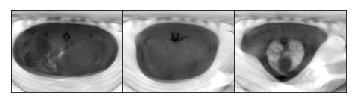

In [366]:
hf.draw_slices(rec_cropped)

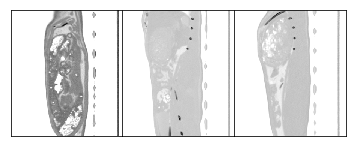

In [315]:
hf.draw_slices(np.transpose(mdct1_iso,(2,1,0)))

In [306]:
print(np.amin(rec[80,10:120,20:170]), np.amax(rec[80,10:120,20:170]))

-59.913471

pylab.imshow(np.transpose(rec[:,:,::-1][50,20:170,10:120], (1,0)), vmin=0.0005)

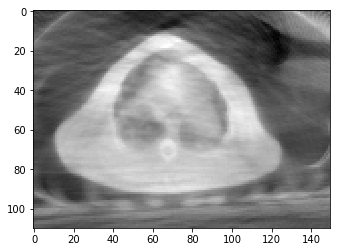

In [23]:
pylab.imshow(rec[100,10:120,20:170])#, vmin=-50, vmax=150) #vmin=.0010, vmax=0.0035)